In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [2]:
df = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)

In [15]:
type(df)

pandas.core.frame.DataFrame

<Axes: xlabel='Month'>

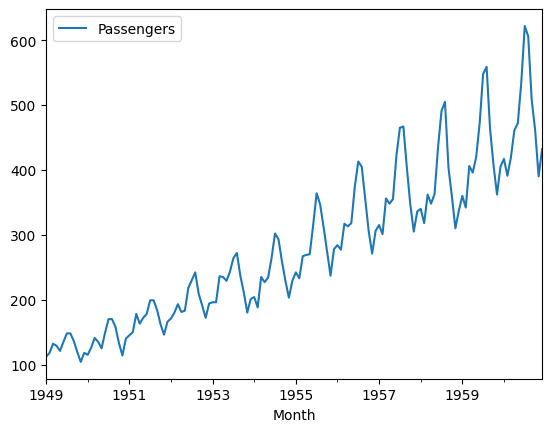

In [3]:
df.plot()

In [5]:
adfuller(df['Passengers'])

(np.float64(0.8153688792060467),
 np.float64(0.991880243437641),
 13,
 130,
 {'1%': np.float64(-3.4816817173418295),
  '5%': np.float64(-2.8840418343195267),
  '10%': np.float64(-2.578770059171598)},
 np.float64(996.692930839019))

In [6]:
def adf(x):
  res = adfuller(x)
  print("Test-Statistic:", res[0])
  print("P-Value:", res[1])
  if res[1] < 0.05:
    print("Stationary")
  else:
    print("Non-Stationary")

In [7]:
adf(df['Passengers'])

Test-Statistic: 0.8153688792060467
P-Value: 0.991880243437641
Non-Stationary


In [8]:
adf(np.random.randn(100))

Test-Statistic: -3.4524905054077166
P-Value: 0.009294435990915565
Stationary


In [9]:
adf(np.random.gamma(1, 1, 100))

Test-Statistic: -8.609489981093493
P-Value: 6.534254677008928e-14
Stationary


<Axes: >

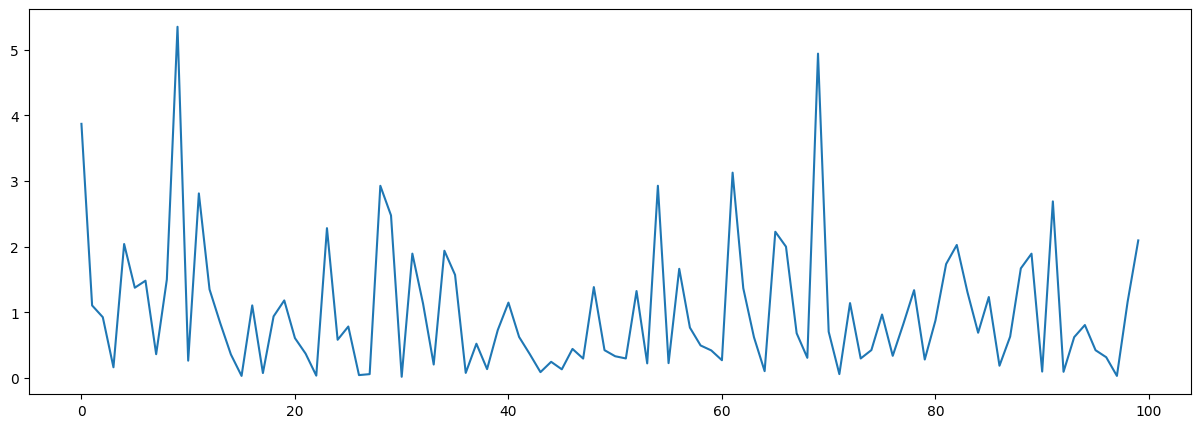

In [18]:
s = pd.Series(np.random.gamma(1, 1, 100))
s.plot(figsize=(15, 5))

In [10]:
df['LogPassengers'] = np.log(df['Passengers'])

In [11]:
df.head()

,Passengers,LogPassengers
Month,,
1949-01-01,112,4.718499
1949-02-01,118,4.770685
1949-03-01,132,4.882802
1949-04-01,129,4.859812
1949-05-01,121,4.795791


In [19]:
adf(df['LogPassengers'])

Test-Statistic: -1.717017089106972
P-Value: 0.4223667747703853
Non-Stationary


In [20]:
df['Diff'] = df['Passengers'].diff()

<Axes: xlabel='Month'>

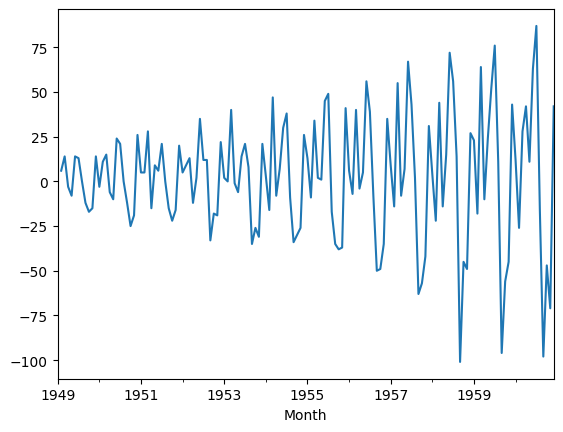

In [21]:
df['Diff'].plot()

In [22]:
adf(df['Diff'].dropna())

Test-Statistic: -2.829266824170019
P-Value: 0.054213290283822914
Non-Stationary


In [23]:
df['DiffLog'] = df['LogPassengers'].diff()

<Axes: xlabel='Month'>

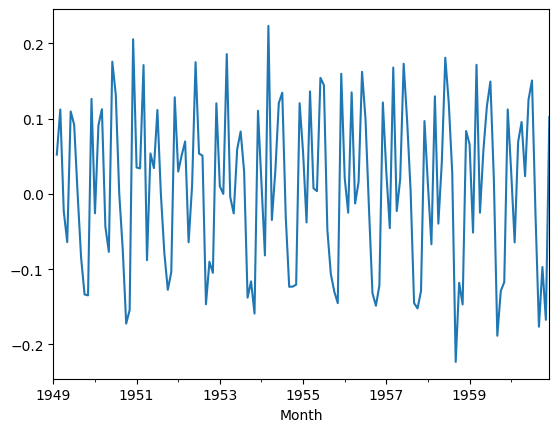

In [24]:
df['DiffLog'].plot()

In [25]:
adf(df['DiffLog'].dropna())

Test-Statistic: -2.7171305983881338
P-Value: 0.0711205481508586
Non-Stationary


In [26]:
!wget -nc https://lazyprogrammer.me/course_files/sp500sub.csv

File ‘sp500sub.csv’ already there; not retrieving.



In [27]:
stocks = pd.read_csv('sp500sub.csv', index_col='Date', parse_dates=True)

In [28]:
stocks.head()

,Open,High,Low,Close,Adj Close,Volume,Name
Date,,,,,,,
2010-01-04,9.22,9.51,9.17,9.50,9.50,1865400.0,INCY
2010-01-05,9.51,10.29,9.45,10.27,10.27,7608900.0,INCY
2010-01-06,10.38,11.09,10.35,11.00,11.00,8046700.0,INCY
2010-01-07,11.00,11.06,10.62,10.82,10.82,3680300.0,INCY
2010-01-08,10.82,11.00,10.75,10.94,10.94,1529300.0,INCY


In [29]:
goog = stocks[stocks['Name'] == 'GOOG'][['Close']]

In [30]:
goog['LogPrice'] = np.log(goog['Close'])

In [31]:
goog['LogPrice'] = np.log(goog['Close'])

In [32]:
goog['LogRet'] = goog['LogPrice'].diff()

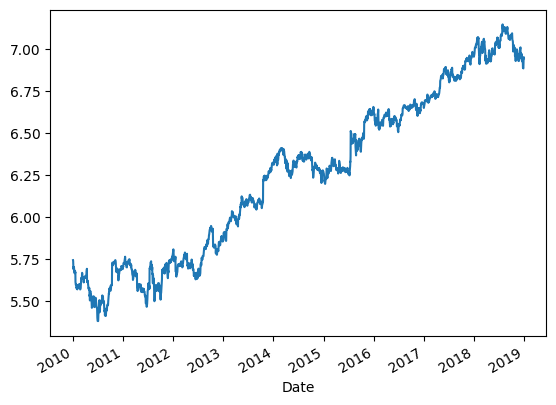

In [33]:
goog['LogPrice'].plot();

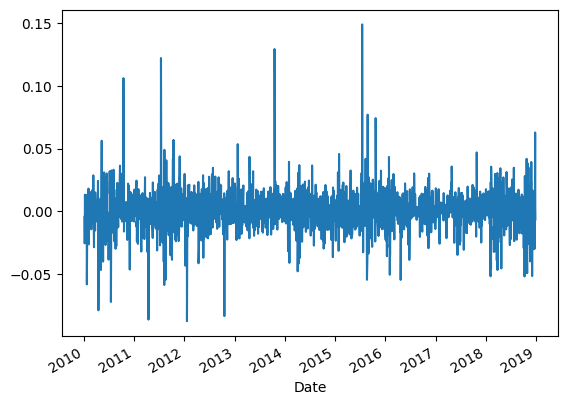

In [34]:
goog['LogRet'].plot();

In [35]:
adf(goog['LogPrice'])

Test-Statistic: -0.4181902578906098
P-Value: 0.9070170677498414
Non-Stationary


In [37]:
adf(goog['LogRet'].dropna())

Test-Statistic: -46.66748022773678
P-Value: 0.0
Stationary


In [38]:
sbux = stocks[stocks['Name'] == 'SBUX'][['Close']]
sbux['LogPrice'] = np.log(sbux['Close'])
sbux['LogRet'] = sbux['LogPrice'].diff()

<Axes: xlabel='Date'>

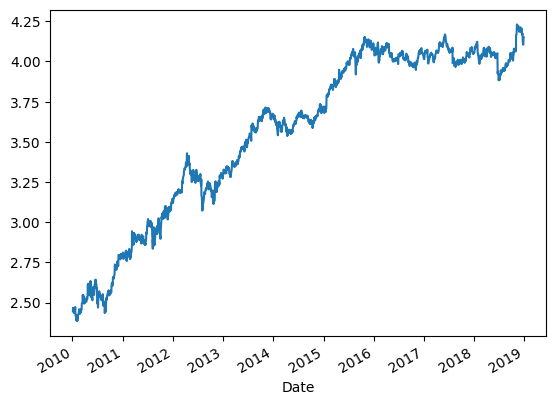

In [39]:
sbux['LogPrice'].plot()

<Axes: xlabel='Date'>

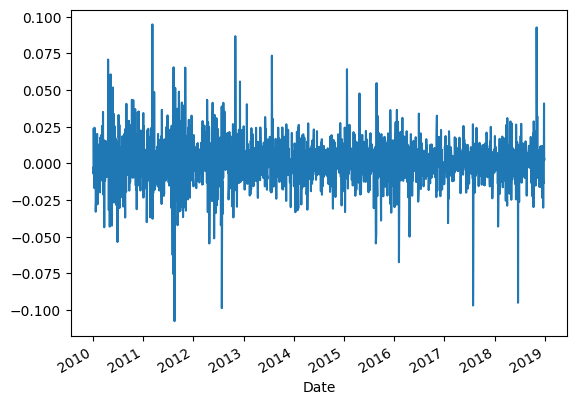

In [40]:
sbux['LogRet'].plot()

In [41]:
adf(sbux['LogPrice'])

Test-Statistic: -1.9020133583899983
P-Value: 0.33111455698537695
Non-Stationary


In [43]:
adf(sbux['LogRet'].dropna())

Test-Statistic: -30.086501426958183
P-Value: 0.0
Stationary
